# Sklearn

## sklearn.linear_model

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection as cross_validation
from sklearn import datasets, linear_model, metrics

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Линейная регрессия

#### Генерация данных

In [3]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)

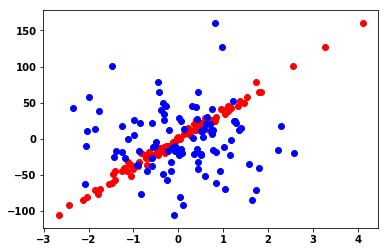

In [4]:
pylab.scatter(map(lambda x:x[0], data), target, color = 'r')
pylab.scatter(map(lambda x:x[1], data), target, color = 'b')

In [5]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(data, target,  
                                                                                     test_size = 0.3)

#### LinearRegression

In [6]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [7]:
print test_labels

[ 17.64282734 -12.98848753  64.19559505 -21.48288019  12.47089016
  -1.42235396  44.41658249   1.72644759 -45.38589148 -71.3715844
 -10.06708677 -18.57607726  34.35183007  18.17188553 -13.99339669
 -27.02798161 160.09441244 -52.37232463 -22.33224966  11.74073026
 -16.30914909 -22.64686884  13.02656201   4.45578287  13.31981235
  20.87713077  44.66274342  24.47584129  14.76930132 -57.46293828]


In [8]:
print predictions

[ 2.16709260e+01 -1.63022478e+01  7.02999701e+01 -2.43555730e+01
  2.01399753e+01 -5.51476634e-01  4.44552466e+01 -1.69230769e-02
 -4.38896367e+01 -7.12480473e+01 -9.58816372e+00 -2.49622748e+01
  3.93050200e+01  1.86958170e+01 -1.47907835e+01 -2.50033887e+01
  1.57558769e+02 -4.06627586e+01 -2.88514262e+01  1.44392441e+01
 -1.19622682e+01 -1.74368944e+01  1.89381360e+01  9.33531571e+00
  1.46273638e+01  1.37736064e+01  5.11002076e+01  2.32601259e+01
  8.08212113e+00 -5.46509684e+01]


In [9]:
metrics.mean_absolute_error(test_labels, predictions)

3.759973502534834

In [14]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring = 'neg_mean_absolute_error', 
                                                  cv = 10)
print 'mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std())

mean: -4.07007149878, std: 1.07371044929


In [13]:
sorted(metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [19]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [20]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring=scorer, 
                                                  cv = 10)
print 'mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std())

mean: 4.07007149878, std: 1.07371044929


In [21]:
coef

array([38.07925837,  0.        ])

In [22]:
linear_regressor.coef_

array([38.23837373,  0.20784359])

In [23]:
# в лекции не указано, что в уравнении обученной модели также участвует свободный член
linear_regressor.intercept_

-0.5734937993158788

In [24]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1])

y = 38.08*x1 + 0.00*x2


In [25]:
print "y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_)

y = 38.24*x1 + 0.21*x2 + -0.57


#### Lasso

In [26]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [27]:
lasso_scoring = cross_validation.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print 'mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std())

mean: 4.15447824667, std: 1.0170354385


In [28]:
print lasso_regressor.coef_

[37.39470822  0.        ]


In [29]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1])

y = 38.08*x1 + 0.00*x2


In [30]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1])

y = 37.39*x1 + 0.00*x2
